# Linear Regression

$$\hat{y}=\theta_{0}+\sum_{i=1}^{n}{\theta_{i}x_{i}}$$

- $\hat{y}$: predicted value
- n: number of features
- $x_i$: feature value
- $\theta_i$: $i^{th}$ model parameter

Using vector notation:
$$\hat{y}=\theta^{T}X$$

A set of parameters that minimize the Root Mean Square Error (RMSE) also minimize the Mean Square Error (MSE):
$$MSE(\textbf{X},h(\theta))=\frac{1}{m}\sum_{i=1}^{m}\left(\theta^{T}X^{(i)}-y^{(i)}\right)^{2}$$
This is the cost function for a linear regression. To simplify, it can be noted as $MSE(\theta)$

If we have a set of feature values and the actual output values, and we want to find the set of parameters that best describes the system, we can note this as:
$$X^{T}\theta=y$$
We cannot assure that there is a set of $\theta$ that generates $y$, but we can find the model parameters that best fit the problem:
$$XX^{T}\hat{\theta}=X^{T}y$$
$XX^{T}$ is always invertible, so:
$$\hat{\theta}=(XX^{T})^{-1}X^{T}y$$

In [1]:
#As an example:
import numpy as np

X = 2 * np.random.rand(100, 1) #column vector of 100 random numbers in [0,2)
y = 4 + 3 * X + np.random.randn(100, 1) #theta should be [4, 3] + noise

In [2]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[[4.09250532]
 [2.87492575]]


In [3]:
#using the parameters found:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict) #y = [min_value, max_value]

[[4.09250532]
 [9.84235682]]


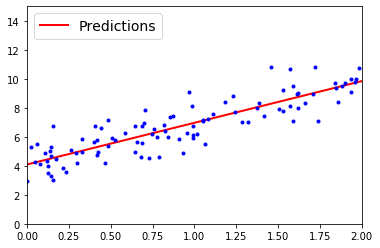

In [6]:
#plotting the model:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
#The same stuff with sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ #AKA theta[0], theta[1:]

(array([4.09250532]), array([[2.87492575]]))

# Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.<br>
It starts by filling θ with random values (this is called random initialization). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.<br>
Some considerations:<br>
   - The minimum can be a local one, it's not guaranteed that it's the global
   - For non-continous functions, the algorirm may not converge
   - If some variable has a much bigger slope than the others, it will has more weight. Hence, the algoritm will try to fit it better before going to the others. It is highly recommended that the features have a similar scale
   - The more parameters the model has, the longer it takes for the algoritm to converge
   

In this case, we want to minimize the MSE function, to do it, we have to do the gradient:
$$\frac{\partial}{\partial\theta_{j}}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}\left(\theta^{T}X^(i)-y^{(i)}\right)x_{j}^{(i)}$$

The gradient vector, noted $\nabla_{\theta}MSE(\theta)$, contains all the partial derivatives of the cost function (one for each model parameter):
$$\nabla_{\theta}MSE(\theta)=\frac{2}{m}X^{T}\left(X\theta-y\right)$$

#### $\color{red}{\text{At each step, Gradient Descent algoritm uses the whole Train Set. This is why the algoritm is slow for large amount of training data.}}$

However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

Once the gradient is available, the iteration part comes next:
$$\theta^{(k+1)}=\theta^{(k)}-\eta MSE(\theta^{(k)})$$
Where $\eta$ represents the *learning rate* and the minus operator means that we are moving against the gradient.

In [8]:
eta = 0.1  # learning rate
n_iterations = 1000 #max iterations
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[4.09250532]
 [2.87492575]]


If the learning rate is low, the algoritm takes too long to converge<br>
If it's high, it may diverge<br>
Finding a proper value is possible with a grid search, limitating the amount of iterations to discard those values that takes too much time to converge.

One improvement is to add a $\epsilon$ value that represent the variation $\theta$ has in this iteration, if it's lower than a threshold you can break the iteration.

### Stochastic Gradient Descent

What if, instead of picking the whole train set each iteration, we rendomly pick just one?<br>
**Obviously**, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration <br>
**On the other hand**, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down.<br>


Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.

In [9]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
print(theta)

[[4.06296659]
 [2.86356196]]


In [10]:
#with sklearn:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.03292513] [2.81493828]


Another variant is **Mini-batch Gradient Descent**. This variation rendomly takes a set of training values each iteration.
It's a combination of the previous two algoritms. It's faster than Batch and performs better than Stochastic.<br>
But it may not converge in the minimum and it can be stuck in a local point.